In [3]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report







Using TensorFlow backend.


In [4]:
    #load cifar10 dataset
	(trainData, trainLabels), (testData, testLabels) = cifar10.load_data()
	labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
	numPfSamples,imgWidth,imgHeight,numOfchannels=trainData.shape
	print("[INFO] Original cifar10 dataset of trainData shape {}".format(trainData.shape))
	print("[INFO] Original cifar10 dataset of trainLabels shape {}".format(trainLabels.shape))
	print("[INFO] Original cifar10 dataset of testData shape {}".format(testData.shape))
	print("[INFO] Original cifar10 dataset of testLabels shape {}".format(testLabels.shape))
	print("[INFO] labels in cifar10 are {}".format(labels)) 
	(x,y)=6,7

[INFO] Original cifar10 dataset of trainData shape (50000, 32, 32, 3)
[INFO] Original cifar10 dataset of trainLabels shape (50000, 1)
[INFO] Original cifar10 dataset of testData shape (10000, 32, 32, 3)
[INFO] Original cifar10 dataset of testLabels shape (10000, 1)
[INFO] labels in cifar10 are ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
	print(trainLabels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
	trainX = trainData.reshape((trainData.shape[0], imgWidth,imgHeight,  numOfchannels))
	testX = testData.reshape((testData.shape[0], imgWidth,imgHeight, numOfchannels))
	trainX = trainX.astype("float32") / 255.0
	testX = testX.astype("float32") / 255.0
	trainLabels=trainLabels.astype(str)
	testLabels=testLabels.astype(str)
	lb = LabelBinarizer()
	trainY = lb.fit_transform(trainLabels)
	testY = lb.fit_transform(testLabels)
	print("[INFO] Data ready for training")

[INFO] Data ready for training


In [10]:
def drarwGridOfImagesFromImagesData(images,fileNameToSaveImage=None):



  # Parameters for our graph; we'll output images in a 4x4 configuration
  nrows = 4
  ncols = 4
 
     
  pic_index = 0 # Index for iterating over images

  #display a batch of 4*4 pictures

  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)



  for i in range(16):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = images[i]
    plt.imshow(img)
 
  if(fileNameToSaveImage != None):
    plt.savefig(fileNameToSaveImage)
  plt.show()


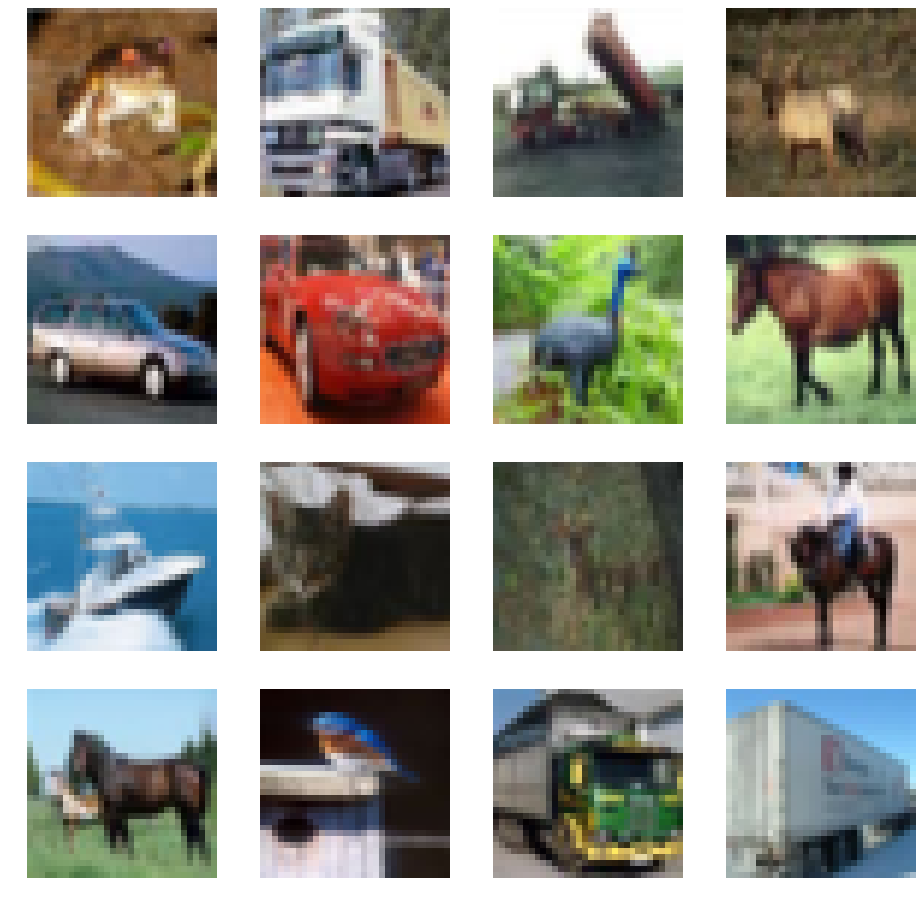

In [11]:
drarwGridOfImagesFromImagesData(trainData)

In [4]:
	#tuning parameters
	weight_decay = 1e-4
	INIT_LR = 1e-3
	EPOCHS=25
	BS=32

In [5]:
	#define model
	model = tf.keras.models.Sequential()
	model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32,32,3)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.2))	 
	model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.3))	 
	model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.4))
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(10, activation="softmax"))
	model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_v

In [7]:
    #compile model
	opt = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
	model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
	print("[INFO] Model compiled")

[INFO] Model compiled


In [ ]:
	# train the network
	print("[INFO] training network...")
	aug = ImageDataGenerator()
	history = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS, verbose=1)
	model.save("cifar10model.keras2")
	print("[INFO] Model saved to {}".format("cifar10model.keras2"))

[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
1563/1563 [==============================] - 1239s 793ms/step - loss: 1.6581 - acc: 0.4873 - val_loss: 1.1927 - val_acc: 0.6323
Epoch 2/25
1563/1563 [==============================] - 1404s 898ms/step - loss: 1.0382 - acc: 0.6632 - val_loss: 0.9446 - val_acc: 0.6960
Epoch 3/25
1563/1563 [==============================] - 1098s 703ms/step - loss: 0.8823 - acc: 0.7173 - val_loss: 0.8605 - val_acc: 0.7254
Epoch 4/25
1563/1563 [==============================] - 1146s 733ms/step - loss: 0.7914 - acc: 0.7544 - val_loss: 0.7144 - val_acc: 0.7851
Epoch 5/25
1172/1563 [=====================>........] - ETA: 4:52 - loss: 0.7308 - acc: 0.7798

In [ ]:
	#draw training curves	
	acc      = history.history[     'acc' ]
	val_acc  = history.history[ 'val_acc' ]
	loss     = history.history[    'loss' ]
	val_loss = history.history['val_loss' ]   
	epochs   = range(len(acc)) # Get number of epochs
	plt.style.use("ggplot")
	plt.figure()
	plt.plot(epochs, loss, label="train_loss")
	plt.plot(epochs, val_loss, label="val_loss")
	plt.plot(epochs, acc, label="train_acc")
	plt.plot(epochs, val_acc, label="val_acc")
	plt.title("CIFAR10 Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")
	plt.show()

In [ ]:
	# evaluate the network
	print("[INFO] evaluating network...")
	predictions = model.predict(testX, batch_size=32)
	y_true=testY.argmax(axis=1)
	y_pred=predictions.argmax(axis=1)
	print(classification_report(y_true,y_pred, target_names=labels))
	print(confusion_matrix(y_true, y_pred))
	print(labels)